In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def genData(D):
    # generate DxD matrix (random normal numbers, mean = 0, std = 1)
    A = np.random.normal(0,1,(D,D))
    # generate v vector (random normal numbers, mean = 0, std = 1)
    v = np.random.normal(0,1,(D,1))
    # randomly choose k
    k = np.random.randint(D)
    # generate e_k column
    e_k = np.array([[int(i==k)] for i in range(D)])
    
    return A, v, e_k

In [3]:
def gradDescent(alpha, A, v, e_k):
    # store Fv at each iteration
    F = []
    flag = False
    iter = 0
    # print("****Vanilla Gradient Descent****")
    while not (flag):
        iter += 1
        pred = A @ v
        Fv = sum(np.square(pred - e_k))
        F.append(Fv)
        v = v - (alpha * (np.transpose(A) @ (pred - e_k)))
        # print("Iteration {}: Cost={}".format(iter, Fv))
        # break loop if cost is very small
        if Fv <= 0.0001:
            flag = True
    return F, iter

In [4]:
def momentumGradDescent(alpha, beta, A, v, e_k):
    # generate symmetric matrix Q as (A.t)(A)
    Q = np.transpose(A) @ A
    # generate c vector
    c = -np.transpose(A) @ e_k
    x_t = v
    # store Fv at each iteration
    F = []
    flag = False
    iter = 0
    # let x[t-1] be 0 for initial step
    x_t_minus_1 = np.zeros_like(x_t)
    # print("****Momentum Gradient Descent****")
    while not (flag):
        iter += 1
        grad_F = Q @ x_t + c
        d_t = x_t - x_t_minus_1
        F_x_t = sum(np.square((A @ x_t) - e_k))
        F.append(F_x_t)
        x_t_plus_1 = x_t - (alpha * grad_F) + (beta * d_t)
        #print("Iteration {}: Cost={}".format(iter, F_x_t))
        # break loop if cost is very small
        if F_x_t <= 0.0001:
            flag = True
        x_t_minus_1 = x_t
        x_t = x_t_plus_1
    
    return F, iter

Vanilla Grad Descent:       minimum Fv = [9.97152924e-05], Total iterations = 2191
Momentum Grad Descent:    minimum Fv = [9.93027012e-05], Total iterations = 543
Vanilla Grad Descent Decay Rate = [0.01099045], Momentum Grad Desecnt Decay Rate = [0.04434635]



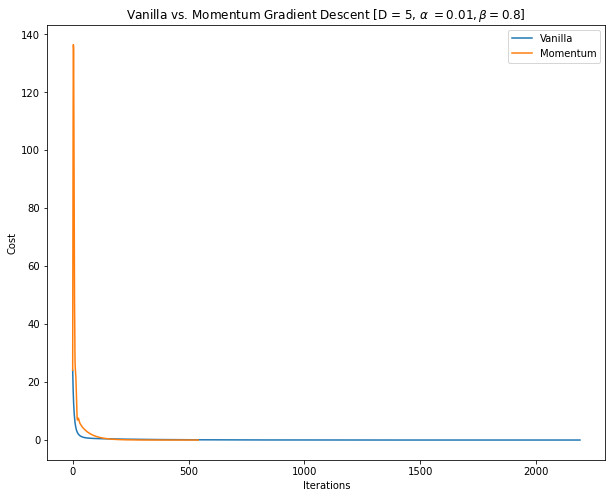

In [5]:
# set alpha
alpha = 0.01
# set beta
beta = 0.8
# set dimension
D = 5

# generate random matrix and vector
[A, v, e_k] = genData(D)
# run gradient descent for D = 10
[F_grad, iter_grad] = gradDescent(alpha, A, v, e_k)
[F_momentGrad, iter_momentGrad] = momentumGradDescent(alpha, beta, A, v, e_k)

print("Vanilla Grad Descent:       minimum Fv = {}, Total iterations = {}"\
    .format(F_grad[len(F_grad)-1], iter_grad))
print("Momentum Grad Descent:    minimum Fv = {}, Total iterations = {}"\
    .format(F_momentGrad[len(F_momentGrad)-1], iter_momentGrad))
d_grad = abs(F_grad[len(F_grad)-1] - F_grad[0])/iter_grad
d_momentGrad = abs(F_momentGrad[len(F_momentGrad)-1] - F_momentGrad[0])/iter_momentGrad
print("Vanilla Grad Descent Decay Rate = {}, Momentum Grad Desecnt Decay Rate = {}\n"\
    .format(d_grad, d_momentGrad))

plt.figure(figsize=(10, 8))
plt.plot(F_grad)
plt.plot(F_momentGrad)
plt.title(r'Vanilla vs. Momentum Gradient Descent [D = {}, $\alpha\ = {}, \beta = {}$]'\
    .format(D, alpha, beta))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(['Vanilla', 'Momentum'])
plt.show()

##### *The above graph clearly depicts the faster convergence with momentum gradient descent*
##### *as compared to Naive gradient descent.*